In [8]:
from DataLoader import DataLoader
import warnings
warnings.simplefilter(action='ignore')

from tqdm import tqdm
import numpy as np
import pandas as pd


dl = DataLoader(handle_nans="drop")




Loading Robinhood data
Loading CRSP data


In [9]:
dl.merge_dfs()


Merging...


In [4]:
df = dl.df_merged
df["holders_rank"] = df.groupby("date")["holders"].rank(ascending=False)
#df = df[df["holders_rank"]<0.025*5221]

df["daily_holders"] = df[["date", "holders"]].groupby("date")["holders"].transform("sum")

df

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,holders_rank
0,2018-05-02,A,590.000000,3.336986,176.806240,11.0,2240482.0,65.91,322477000.0,2.125446e+10,38886.900000,NaN,5.239962e+06,0.000113,1018.0
1,2018-05-03,A,586.473684,3.347945,175.174218,11.0,2365851.0,66.34,322477000.0,2.139312e+10,38906.664211,-3.526316,5.248722e+06,0.000112,1023.5
2,2018-05-04,A,587.458333,3.358904,174.895833,11.0,1331017.0,67.00,322477000.0,2.160596e+10,39359.708333,0.984649,5.246256e+06,0.000112,1026.0
3,2018-05-07,A,585.900000,3.391781,172.741115,11.0,1468735.0,67.39,322477000.0,2.173173e+10,39483.801000,-1.558333,5.236044e+06,0.000112,1029.0
4,2018-05-08,A,577.125000,3.402740,169.605978,11.0,1916103.0,67.37,322477000.0,2.172528e+10,38880.911250,-8.775000,5.242656e+06,0.000110,1046.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914450,2020-08-07,ZYNE,32151.291667,11.502732,2795.100416,11.0,542213.0,4.22,29255000.0,1.234561e+08,135678.450833,-78.916667,3.259810e+07,0.000986,171.0
2914451,2020-08-10,ZYNE,32060.833333,11.523224,2782.279787,11.0,584599.0,4.24,29255000.0,1.240412e+08,135937.933333,-90.458333,3.266178e+07,0.000982,170.0
2914452,2020-08-11,ZYNE,31939.875000,11.530055,2770.140818,11.0,449620.0,4.07,29255000.0,1.190679e+08,129995.291250,-120.958333,3.269811e+07,0.000977,171.0
2914453,2020-08-12,ZYNE,31851.578947,11.536885,2760.847340,11.0,980844.0,3.96,29255000.0,1.158498e+08,126132.252632,-88.296053,3.268230e+07,0.000975,171.0


In [5]:
df[["holders", "date"]].groupby("date").sum()

,holders
date,
2018-05-02,5.239962e+06
2018-05-03,5.248722e+06
2018-05-04,5.246256e+06
2018-05-07,5.236044e+06
2018-05-08,5.242656e+06
...,...
2020-08-07,3.259810e+07
2020-08-10,3.266178e+07
2020-08-11,3.269811e+07


In [6]:
dl.df_merged[["date", "holders"]].groupby("date").transform('sum')

,holders
0,5.239962e+06
1,5.248722e+06
2,5.246256e+06
3,5.236044e+06
4,5.242656e+06
...,...
2914450,3.259810e+07
2914451,3.266178e+07
2914452,3.269811e+07
2914453,3.268230e+07


In [ ]:
returns[["popularity", "date", "holders"]].groupby("date").sum()

,popularity,holders
date,,
2018-05-02,1.0,5.239962e+06
2018-05-03,1.0,5.248722e+06
2018-05-04,1.0,5.246256e+06
2018-05-07,1.0,5.236044e+06
2018-05-08,1.0,5.242656e+06
...,...,...
2020-08-07,1.0,3.259810e+07
2020-08-10,1.0,3.266178e+07
2020-08-11,1.0,3.269811e+07


## Claude

In [ ]:
from DataLoader import DataLoader

dl = DataLoader(handle_nans="drop")


Loading Robinhood data
Loading CRSP data
Merging...


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from tqdm.auto import tqdm

# Assuming your dataframe is loaded as returns
# First, let's create some time-based features

def calculate_features(returns):
    """Calculate engineered features from Robintrack data"""
    
    # Create a copy to avoid modifying the original
    data = returns.copy()
    
    # 1. Basic transformations
    # Normalize holder counts by users to get percentage
    data['holder_percentage'] = data['holders'] / data['users'] * 100
    
    # Calculate log returns of holders (better for analysis than raw changes)
    data['log_holder_change'] = np.log(data['holders'] / data['holders'].shift(1))
    
    # 2. Create groupby object for ticker-level operations
    grouped = data.groupby('ticker')
    
    # Create empty dataframes for ticker-level metrics
    ticker_metrics = []
    
    # 3. Calculate features for each ticker
    for ticker, group in tqdm(grouped, desc="Processing tickers"):
        # Sort by date
        group = group.sort_values('date')
        
        # Skip if not enough data
        if len(group) < 30:
            continue
            
        # Calculate time-based features
        group['holders_7d_pct_change'] = group['holders'].pct_change(periods=7)
        group['holders_30d_pct_change'] = group['holders'].pct_change(periods=30)
        
        # Volatility metrics
        group['holders_7d_std'] = group['holders'].rolling(7).std()
        group['holders_30d_std'] = group['holders'].rolling(30).std()
        group['holders_7d_cv'] = group['holders_7d_std'] / group['holders'].rolling(7).mean()
        
        # Momentum indicators
        group['holders_7d_ma'] = group['holders'].rolling(7).mean()
        group['holders_30d_ma'] = group['holders'].rolling(30).mean()
        group['ma_cross_signal'] = np.where(group['holders_7d_ma'] > group['holders_30d_ma'], 1, -1)
        
        # Acceleration (second derivative)
        group['holder_change_acceleration'] = group['daily_change_holders'].diff()
        
        # Relationship to price
        group['price_holder_corr_30d'] = group['holders'].rolling(30).corr(group['prc_adj'])
        
        # Calculate retail concentration
        group['retail_concentration'] = group['mc_retail'] / group['mc'] * 100
        
        # Identify trend strength using linear regression slope
        if len(group) >= 30:
            for window in [30, 90]:
                if len(group) >= window:
                    group[f'trend_strength_{window}d'] = group['holders'].rolling(window=window).apply(
                        lambda x: stats.linregress(np.arange(len(x)), x)[0] / np.mean(x), raw=True
                    )
        
        # Relative strength compared to overall market
        group = group.dropna(subset=['holders'])
        
        # Add back to the list
        ticker_metrics.append(group)
    
    # Combine all ticker data
    result = pd.concat(ticker_metrics)
    
    # Fill NaN values for calculated columns
    numeric_cols = result.select_dtypes(include=['float64']).columns
    result[numeric_cols] = result[numeric_cols].fillna(0)
    
    return result

# Function to create ticker-level summary metrics
def create_ticker_summary(returns):
    """Create a summary dataframe with one row per ticker"""
    # Group by ticker and calculate aggregate metrics
    with tqdm(total=1, desc="Creating ticker summary") as pbar:
        ticker_summary = returns.groupby('ticker').agg({
            'holders': ['mean', 'std', 'min', 'max'],
            'daily_change_holders': ['mean', 'std', 'min', 'max'],
            'prc_adj': ['mean', 'std', 'min', 'max'],
            'holder_percentage': ['mean', 'max'],
            'log_holder_change': ['mean', 'std'],
            'holders_7d_pct_change': ['mean', 'std', 'min', 'max'],
            'holders_30d_pct_change': ['mean', 'std'],
            'holders_7d_cv': 'mean',
            'price_holder_corr_30d': 'mean',
            'retail_concentration': 'mean',
            'trend_strength_30d': 'mean',
            'ma_cross_signal': 'mean'
        })
        
        # Flatten column names
        ticker_summary.columns = ['_'.join(col).strip() for col in ticker_summary.columns.values]
        
        # Add additional derived metrics
        ticker_summary['volatility_ratio'] = ticker_summary['holders_std'] / ticker_summary['holders_mean']
        ticker_summary['holder_range_ratio'] = ticker_summary['holders_max'] / ticker_summary['holders_min']
        pbar.update(1)
    
    return ticker_summary

# Function to identify pattern clusters
def identify_patterns(ticker_summary, n_clusters=6):
    """Identify patterns in the ticker summary data using clustering"""
    with tqdm(total=4, desc="Identifying patterns") as pbar:
        # Select features for clustering
        cluster_features = [
            'holders_mean', 'holders_std', 'daily_change_holders_mean', 
            'holders_7d_pct_change_mean', 'holders_7d_pct_change_std',
            'holders_7d_cv_mean', 'price_holder_corr_30d_mean', 
            'trend_strength_30d_mean', 'volatility_ratio', 'holder_range_ratio'
        ]
        
        # Get subset with features
        X = ticker_summary[cluster_features].copy()
        
        # Debug: Check for infinity and NaN values
        print("Checking for problematic values in features:")
        for col in X.columns:
            inf_count = np.isinf(X[col]).sum()
            nan_count = X[col].isna().sum()
            if inf_count > 0 or nan_count > 0:
                print(f"Column {col}: {inf_count} infinities, {nan_count} NaNs")
                
                # Replace infinities with NaNs, then fill with column median or 0
                X[col] = X[col].replace([np.inf, -np.inf], np.nan)
                if X[col].notna().sum() > 0:  # If there are non-NaN values
                    median_val = X[col].median()
                    X[col] = X[col].fillna(median_val)
                    print(f"  - Replaced with median: {median_val}")
                else:
                    X[col] = X[col].fillna(0)
                    print(f"  - Replaced with zeros")
        
        # Handle missing values and scaling
        X = X.fillna(0)
        
        # Additional safety check for any remaining infinities
        X = X.replace([np.inf, -np.inf], 0)
        
        # Debug: Verify all infinity and NaN values are gone
        inf_remaining = np.isinf(X).sum().sum()
        nan_remaining = X.isna().sum().sum()
        print(f"After fixing: {inf_remaining} infinities, {nan_remaining} NaNs remain")
        
        # Apply standard scaling
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        pbar.update(1)
        
        # PCA for dimensionality reduction
        pca = PCA(n_components=min(5, X.shape[1]))  # Ensure n_components doesn't exceed feature count
        X_pca = pca.fit_transform(X_scaled)
        pbar.update(1)
        
        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=min(n_clusters, len(X)//10 + 1), random_state=42)  # Ensure reasonable number of clusters
        clusters = kmeans.fit_predict(X_pca)
        pbar.update(1)
        
        # Add cluster assignments back to the summary
        ticker_summary['pattern_cluster'] = clusters
        
        # Create feature importance per cluster
        cluster_centers = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_))
        cluster_centers_df = pd.DataFrame(
            cluster_centers, 
            columns=cluster_features
        )
        pbar.update(1)
    
    return ticker_summary, cluster_centers_df, X_pca, pca


# Function to visualize patterns
def visualize_patterns(ticker_summary, X_pca, pca):
    """Create visualizations for the identified patterns"""
    with tqdm(total=2, desc="Creating visualizations") as pbar:
        # PCA scatter plot
        plt.figure(figsize=(16, 8))
        
        scatter = plt.scatter(
            X_pca[:, 0], X_pca[:, 1], 
            c=ticker_summary['pattern_cluster'], 
            cmap='viridis',
            alpha=0.6
        )
        
        plt.colorbar(scatter, label='Cluster')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
        plt.title('Stock Patterns Based on Retail Holder Behavior')
        
        # Add annotations for a few notable stocks
        notable_tickers = ticker_summary.sort_values('holders_mean', ascending=False).head(20).index
        
        for ticker in notable_tickers:
            idx = ticker_summary.index.get_loc(ticker)
            plt.annotate(
                ticker, 
                (X_pca[idx, 0], X_pca[idx, 1]),
                fontsize=8
            )
        
        plt.tight_layout()
        pbar.update(1)
        
        # Create a heatmap of cluster characteristics
        cluster_profile = ticker_summary.groupby('pattern_cluster').mean()
        
        # Select key metrics for heatmap
        profile_cols = [
            'holders_mean', 'holders_7d_pct_change_mean', 
            'holders_7d_cv_mean', 'price_holder_corr_30d_mean',
            'volatility_ratio', 'trend_strength_30d_mean'
        ]
        
        plt.figure(figsize=(14, 6))
        sns.heatmap(
            cluster_profile[profile_cols].T,
            cmap='viridis',
            center=0,
            annot=True,
            fmt='.5f'
        )
        plt.title('Cluster Characteristics')
        plt.tight_layout()
        pbar.update(1)
    
    return notable_tickers, cluster_profile

# Main workflow
def main_analysis(df):
    """Main analysis workflow"""
    # Calculate features
    print("Step 1: Calculating features...")
    features_df = calculate_features(df)
    
    # Create ticker summary
    print("Step 2: Creating ticker summary...")
    ticker_summary = create_ticker_summary(features_df)
    
    # Identify patterns
    print("Step 3: Identifying patterns...")
    ticker_summary, cluster_centers, X_pca, pca = identify_patterns(ticker_summary)
    
    # Visualize patterns
    print("Step 4: Visualizing patterns...")
    notable_tickers, cluster_profile = visualize_patterns(ticker_summary, X_pca, pca)
    
    # Create time series plots for representative tickers
    # Get representative tickers for each cluster
    print("Step 5: Finding representative tickers for each pattern...")
    representative_tickers = []
    
    for cluster in tqdm(range(len(cluster_profile)), desc="Finding representative tickers"):
        # Get top 3 stocks most central to the cluster
        cluster_stocks = ticker_summary[ticker_summary['pattern_cluster'] == cluster]
        
        if len(cluster_stocks) >= 3:
            representative_tickers.append(cluster_stocks.index[:3].tolist())
        else:
            representative_tickers.append(cluster_stocks.index.tolist())
    
    # Flatten the list of representative tickers
    representative_tickers = [ticker for sublist in representative_tickers for ticker in sublist]
    
    print(f"Analysis complete. Found {len(cluster_profile)} distinct patterns.")
    
    return features_df, ticker_summary, cluster_profile, representative_tickers

# Function to analyze specific patterns
def analyze_pattern(features_df, ticker_symbol, window_size=90):
    """Analyze patterns for a specific ticker"""
    with tqdm(total=1, desc=f"Analyzing {ticker_symbol}") as pbar:
        ticker_data = features_df[features_df['ticker'] == ticker_symbol].sort_values('date')
        
        if len(ticker_data) < window_size:
            return f"Not enough data for {ticker_symbol}"
        
        # Create figure with subplots
        fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
        
        # Plot 1: Holders and Price
        ax1 = axes[0]
        ax1.set_title(f'{ticker_symbol} - Popularity Holders and Price')
        ax1.plot(ticker_data['date'], ticker_data['popularity'], 'b-', label='popularity')
        ax1.set_ylabel('Number of Holders', color='b')
        ax1.tick_params(axis='y', labelcolor='b')
        
        ax1b = ax1.twinx()
        ax1b.plot(ticker_data['date'], ticker_data['prc_adj'], 'r-', label='Price')
        ax1b.set_ylabel('Price ($)', color='r')
        ax1b.tick_params(axis='y', labelcolor='r')
        
        # Plot 2: Holder Percentage and Moving Averages
        ax2 = axes[1]
        ax2.set_title(f'{ticker_symbol} - Holder Percentage and Moving Averages')
        ax2.plot(ticker_data['date'], ticker_data['holder_percentage'], 'g-', label='Holder %')
        
        ax2b = ax2.twinx()        
        ax2b.plot(ticker_data['date'], ticker_data['holders_7d_ma'], 'b--', label='7-day MA')
        ax2b.plot(ticker_data['date'], ticker_data['holders_30d_ma'], 'r--', label='30-day MA')
        ax2b.set_ylabel('Holder % and MAs')
        ax2b.legend()
        
        # Plot 3: Holder Changes and Price-Holder Correlation
        ax3 = axes[2]
        ax3.set_title(f'{ticker_symbol} - Holder Changes and Price Correlation')
        ax3.plot(ticker_data['date'], ticker_data['daily_change_holders'], 'b-', label='Daily Holder Change')
        ax3.set_ylabel('Daily Change', color='b')
        ax3.tick_params(axis='y', labelcolor='b')
        
        ax3b = ax3.twinx()
        ax3b.plot(ticker_data['date'], ticker_data['price_holder_corr_30d'], 'r-', label='Price-Holder Correlation (30d)')
        ax3b.set_ylabel('Correlation', color='r')
        ax3b.tick_params(axis='y', labelcolor='r')
        ax3b.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        
        plt.tight_layout()
        pbar.update(1)
    
    return fig

Step 1: Calculating features...


Processing tickers: 100%|██████████| 5221/5221 [07:09<00:00, 12.16it/s]


Step 2: Creating ticker summary...


Creating ticker summary: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Step 3: Identifying patterns...


Identifying patterns:   0%|          | 0/4 [00:00<?, ?it/s]

Checking for problematic values in features:
Column holders_7d_pct_change_mean: 15 infinities, 0 NaNs
  - Replaced with median: 0.019217150423497857
Column holders_7d_pct_change_std: 0 infinities, 15 NaNs
  - Replaced with median: 0.06981853059187276
Column price_holder_corr_30d_mean: 65 infinities, 432 NaNs
  - Replaced with median: 0.0019741669561145147
Column holder_range_ratio: 21 infinities, 0 NaNs
  - Replaced with median: 4.491089998109283
After fixing: 0 infinities, 0 NaNs remain


Identifying patterns: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


Step 4: Visualizing patterns...


Creating visualizations: 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]


Step 5: Finding representative tickers for each pattern...


Finding representative tickers: 100%|██████████| 6/6 [00:00<00:00, 1002.82it/s]


Analysis complete. Found 6 distinct patterns.


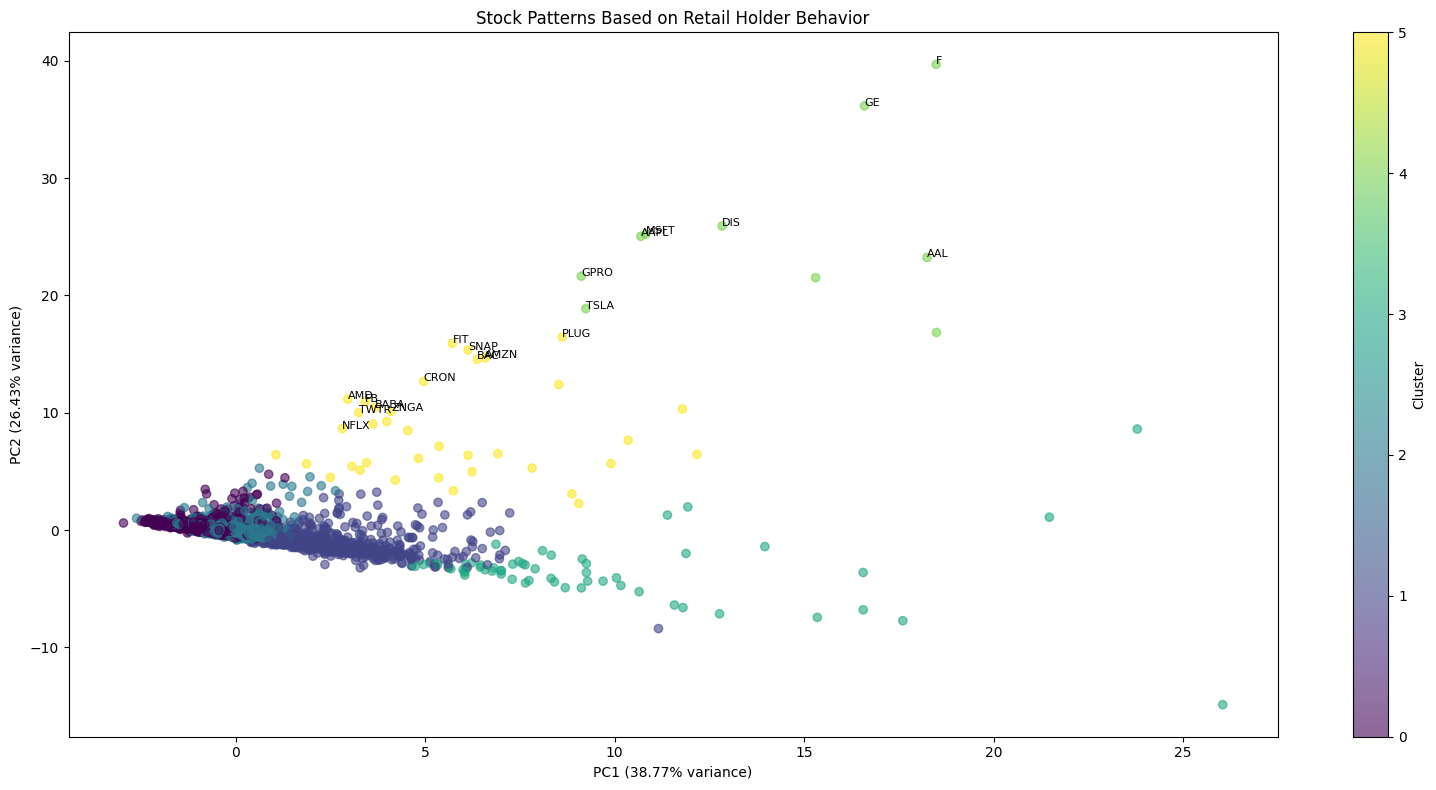

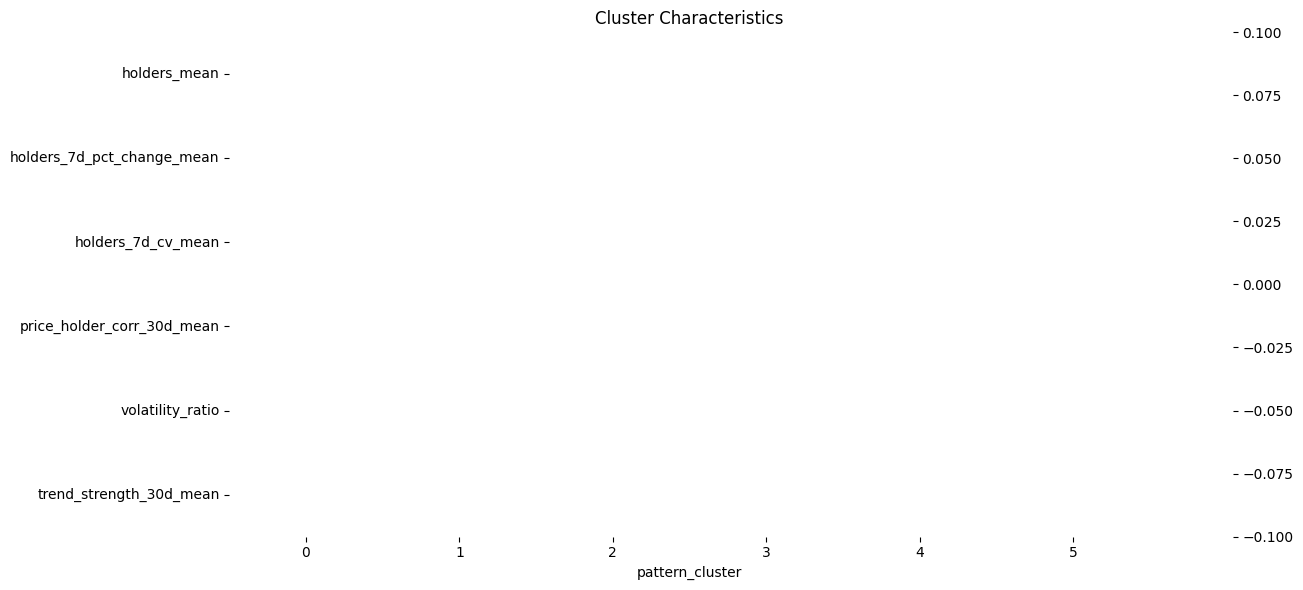

In [10]:

res = main_analysis(df)



In [15]:
figure = analyze_pattern(res[0], "TSLA")

NameError: name 'res' is not defined

In [12]:
df[["popularity", "date", "holders"]].groupby("date").sum()

,popularity,holders
date,,
2018-05-02,1.0,5.239962e+06
2018-05-03,1.0,5.248722e+06
2018-05-04,1.0,5.246256e+06
2018-05-07,1.0,5.236044e+06
2018-05-08,1.0,5.242656e+06
...,...,...
2020-08-07,1.0,3.259810e+07
2020-08-10,1.0,3.266178e+07
2020-08-11,1.0,3.269811e+07


### Popularity

Computed as:
\begin{equation*}
    \text{Pop}_{i,d} = \dfrac{N_{i,d}}{\sum_iN_{i,d}}  
\end{equation*}

it is the popularity of stock $i$ in day $d$, where $N$ is the number of open positions

In [ ]:
from DataLoader import DataLoader
import numpy as np

dl = DataLoader(handle_nans="drop")

df = dl.df_merged

Loading Robinhood data
Loading CRSP data
Loading merged df


In [10]:
df["popularity_change"] = df.groupby("ticker")["popularity"].pct_change()
df = df.replace(np.inf, np.nan)
df = df.dropna()
df.sort_values(by=["popularity_change", "date"], ascending=[True, False][::-1])

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,popularity_change
1350065,2020-03-09,IGOV,1008.958333,10.471311,96.354534,73.0,296058.0,53.09000,16750000.0,8.892575e+08,53565.597917,973.250000,1.282694e+07,0.000079,26.952362
1373475,2018-05-03,IMTE,835.750000,3.347945,249.630728,12.0,858722.0,32.11000,2644000.0,8.489884e+07,26835.932500,805.750000,5.248722e+06,0.000159,26.811834
406075,2020-03-17,CCNE,413.222222,10.525956,39.257452,11.0,159000.0,21.53000,15248000.0,3.282894e+08,8896.674444,380.830918,1.423457e+07,0.000029,11.341286
2604561,2020-04-21,TSC,821.333333,10.765027,76.296447,11.0,1784117.0,12.91000,29763000.0,3.842403e+08,10603.413333,746.159420,2.160872e+07,0.000038,9.718071
320167,2018-05-03,BOXL,519.238095,3.347945,155.091575,11.0,2010766.0,8.33000,9648000.0,8.036784e+07,4325.253333,463.238095,5.248722e+06,0.000099,8.256632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917334,2019-09-16,NWLI,0.000000,8.838356,0.000000,11.0,4104.0,280.04999,3436000.0,9.622518e+08,0.000000,-0.625000,9.831534e+06,0.000000,-1.000000
996741,2019-10-17,FMK,0.000000,9.178082,0.000000,73.0,13959.0,36.30000,600000.0,2.178000e+07,0.000000,-0.583333,9.947153e+06,0.000000,-1.000000
996753,2019-11-04,FMK,0.000000,9.375342,0.000000,73.0,630.0,37.19000,650000.0,2.417350e+07,0.000000,-0.625000,1.007581e+07,0.000000,-1.000000
1099450,2020-01-16,GEC,0.000000,10.109290,0.000000,11.0,7702.0,3.10000,25411000.0,7.877410e+07,0.000000,-61.000000,1.096158e+07,0.000000,-1.000000


In [14]:
df[df["ticker"]=="IGOV"]

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,holders_rank,popularity_change
1349613,2018-05-03,IGOV,25.000000,3.347945,7.467267,73.0,275270.0,50.12,22700000.0,1.137724e+09,1253.000000,0.000000,5.248722e+06,0.000005,4252.5,-0.001669
1349614,2018-05-04,IGOV,25.000000,3.358904,7.442904,73.0,161930.0,49.97,22700000.0,1.134319e+09,1249.250000,0.000000,5.246256e+06,0.000005,4254.0,0.000470
1349615,2018-05-07,IGOV,25.000000,3.391781,7.370759,73.0,132429.0,49.89,22700000.0,1.132503e+09,1247.250000,0.000000,5.236044e+06,0.000005,4260.5,0.001950
1349616,2018-05-08,IGOV,25.125000,3.402740,7.383756,73.0,157751.0,49.59,22700000.0,1.125693e+09,1245.948750,0.125000,5.242656e+06,0.000005,4243.0,0.003732
1349617,2018-05-09,IGOV,25.416667,3.413699,7.445492,73.0,103023.0,49.61,22650000.0,1.123666e+09,1260.920833,0.291667,5.249612e+06,0.000005,4237.5,0.010268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350171,2020-08-07,IGOV,754.916667,11.502732,65.629335,73.0,147147.0,53.35,17700000.0,9.442950e+08,40274.804167,-5.916667,3.259810e+07,0.000023,2214.0,-0.009422
1350172,2020-08-10,IGOV,746.875000,11.523224,64.814760,73.0,91707.0,53.30,17700000.0,9.434100e+08,39808.437500,-8.041667,3.266178e+07,0.000023,2227.0,-0.012581
1350173,2020-08-11,IGOV,740.958333,11.530055,64.263211,73.0,120379.0,53.07,17700000.0,9.393390e+08,39322.658750,-5.916667,3.269811e+07,0.000023,2238.0,-0.009024
1350174,2020-08-12,IGOV,738.105263,11.536885,63.977863,73.0,91276.0,53.07,17800000.0,9.446460e+08,39171.246316,-2.853070,3.268230e+07,0.000023,2241.0,-0.003369


In [53]:
df_covid = df[df["date"] > "2020-02-01"]

# Rank stocks by popularity within each date (lower rank = more popular)
df_covid["popularity_rank"] = df_covid.groupby("date")["popularity"].rank(ascending=False)

# Sort: First by date (ascending), then by popularity rank (ascending, because 1 is the most popular)
df_covid = df_covid.sort_values(["date", "popularity_rank"], ascending=[True, True])

# Get the top 10 most popular per date
df_top = df_covid.groupby("date").head(10)

df_top

,date,ticker,holders,users,holders_adj,shrcd,vol,prc_adj,shrout_adj,mc,mc_retail,daily_change_holders,daily_holders,popularity,popularity_change,popularity_rank
900341,2020-02-03,F,340626.458333,10.232240,33289.528371,11.0,71432659.0,8.98000,3.894045e+09,3.496852e+10,3.058826e+06,1380.666667,11393816.50,0.029896,-0.000067,1.0
1098897,2020-02-03,GE,318538.666667,10.232240,31130.881709,11.0,50399270.0,12.26000,8.733549e+09,1.070733e+11,3.905284e+06,-172.583333,11393816.50,0.027957,-0.004659,2.0
1766470,2020-02-03,MSFT,277862.041667,10.232240,27155.542657,11.0,30077416.0,174.38000,7.606047e+09,1.326342e+12,4.845358e+07,1155.083333,11393816.50,0.024387,0.000037,3.0
1157867,2020-02-03,GPRO,269468.125000,10.232240,26335.202603,11.0,4214487.0,4.09000,1.270990e+08,5.198349e+08,1.102125e+06,1354.458333,11393816.50,0.023650,0.000911,4.0
968326,2020-02-03,FIT,262845.291667,10.232240,25687.951068,11.0,5773839.0,6.53000,2.336930e+08,1.526015e+09,1.716380e+06,106.125000,11393816.50,0.023069,-0.003718,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669848,2020-08-13,DIS,598965.400000,11.543716,51886.706840,11.0,6468610.0,130.96001,1.806267e+09,2.365487e+11,7.844051e+07,-1146.389474,32683149.35,0.018326,-0.001936,6.0
624802,2020-08-13,DAL,572753.800000,11.543716,49616.068828,11.0,15767696.0,28.70000,6.378570e+08,1.830650e+10,1.643803e+07,-359.094737,32683149.35,0.017524,-0.000653,7.0
2607461,2020-08-13,TSLA,563436.900000,11.543716,48808.971692,11.0,20387865.0,1621.00000,1.863620e+08,3.020928e+11,9.133312e+08,15034.478947,32683149.35,0.017239,0.027388,8.0
403923,2020-08-13,CCL,481811.050000,11.543716,41737.951314,72.0,21416142.0,15.22000,6.006630e+08,9.142091e+09,7.333164e+06,-726.423684,32683149.35,0.014742,-0.001531,9.0


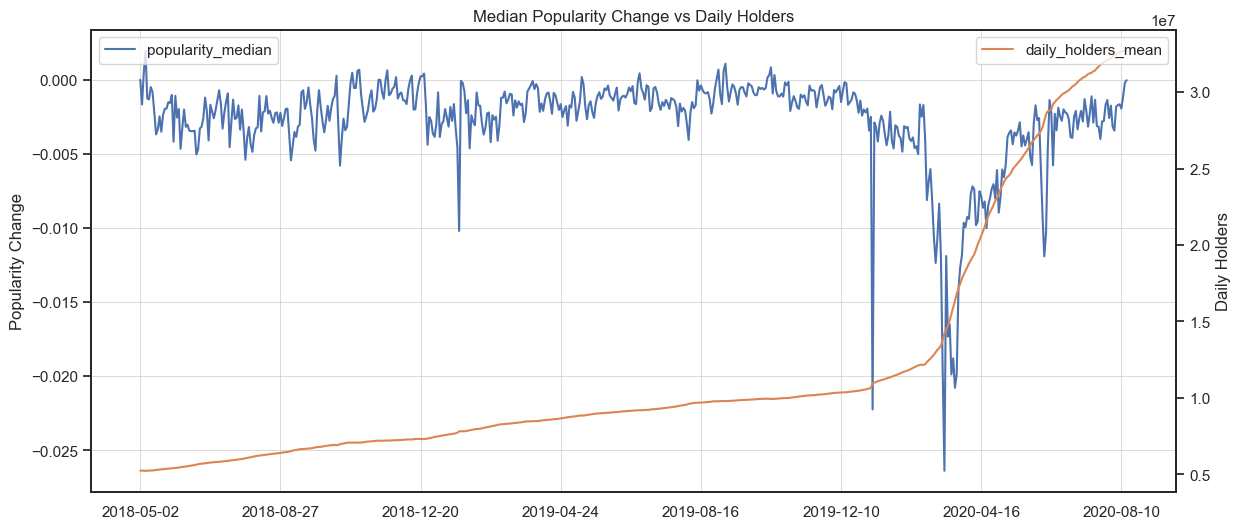

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


df_plot = df[["date", "daily_holders", "popularity_change"]].groupby("date").agg({
    "daily_holders":"mean",
    "popularity_change":("mean", "median", "sum", "skew", "max")
})
        


# Apply Seaborn styling
sns.set_style("white")

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Median Popularity Change vs Daily Holders')

# Define colors using the Seaborn palette
colors = sns.color_palette()

# Plot popularity change with first color
ax.plot(df_plot.index, df_plot[('popularity_change', 'median')], color=colors[0], label='popularity_median')

# Set labels
ax.set_ylabel('Popularity Change')

# Reduce number of x-ticks for better readability
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

# Reduce number of vertical grid lines
ax.grid(True, which='major', linestyle='-', linewidth=0.5)
ax.grid(False, which='minor')

# Create a secondary y-axis for daily holders with second color
ax2 = ax.twinx()
ax2.plot(df_plot.index, df_plot[('daily_holders', 'mean')], color=colors[1], label='daily_holders_mean')

# Set secondary axis label
ax2.set_ylabel('Daily Holders')

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()


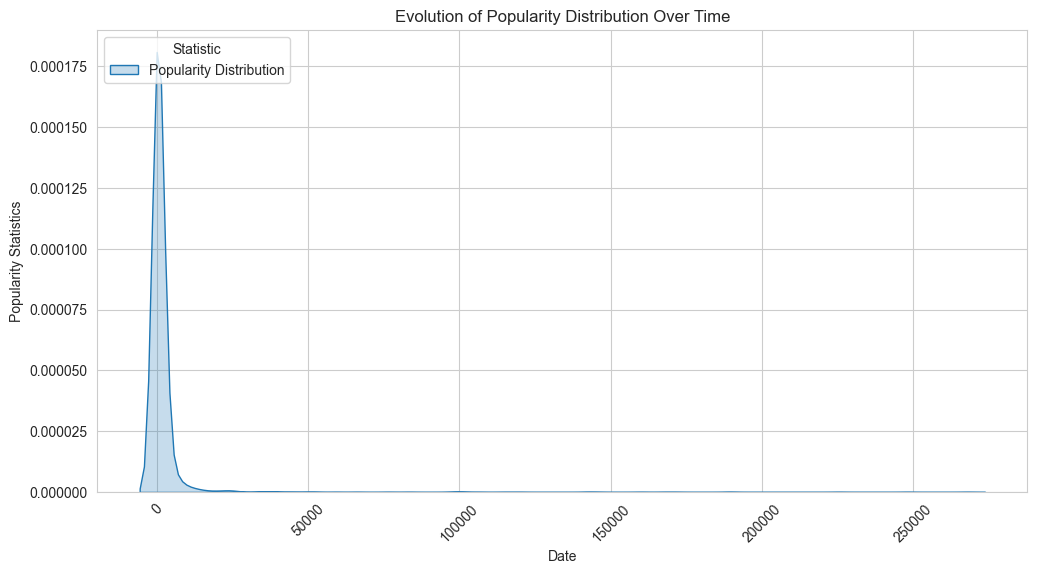

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


df = dl.df_merged


# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure and axis
fig = plt.figure(figsize=(12, 6))  # Use plt.subplots() instead of plt.figure()

# Plot key distribution moments on ax
#sns.lineplot(data=popularity_stats, x=popularity_stats.index, y="skew", label="skew", ax=ax)
sns.kdeplot(data=df[df["date"]=="05-02-2019"]["holders"], label="Popularity Distribution", fill=True)


# Formatting
plt.xlabel("Date")
plt.ylabel("Popularity Statistics")
plt.title("Evolution of Popularity Distribution Over Time")
plt.legend(title="Statistic", loc="upper left")
plt.xticks(rotation=45)
#plt.xscale("log")

# Show plot
plt.show()


## Distribution of Returns

#### Main Problems
**Facts**
> In December 12, 2019, Robinhood introduced fractional share trading on its platform
- I don't know how many stocks each position holds, BUT i know that fractional investments are possible.
    - I can assume that the amount of money invested in each stock is normally distributed and i.i.d. for each stock
    - However, I will never know if someone has sold 99.9% of their position in a certain stock 
- The number of total active users incresed significantly after the early-2020 covid crash

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from DataLoader import DataLoader
import pandas as pd
import numpy as np

dl = DataLoader(handle_nans="drop")



Loading Robinhood data
Loading CRSP data
Merging...


- use popularity alternatively

In [3]:
dl.df_merged["rh_portfolio"] = dl.df_merged["retail_weight"] * dl.df_merged["prc_adj"]
dl.df_merged

,date,ticker,holders,shrcd,vol,prc_adj,shrout_adj,daily_returns,cumulative_returns,mc,mc_retail,daily_change_holders,daily_holders,popularity,market_weight,retail_weight,rh_portfolio
0,2018-05-02,A,590.000000,11.0,2240482.0,65.91,322477000.0,0.000000,0.000000,2.125446e+10,38886.900000,NaN,5.199292e+06,0.000113,0.000653,0.000078,0.005133
1,2018-05-03,A,586.473684,11.0,2365851.0,66.34,322477000.0,0.006503,0.006503,2.139312e+10,38906.664211,-3.526316,5.207544e+06,0.000113,0.000659,0.000078,0.005172
2,2018-05-04,A,587.458333,11.0,1331017.0,67.00,322477000.0,0.009900,0.016402,2.160596e+10,39359.708333,0.984649,5.204840e+06,0.000113,0.000657,0.000078,0.005214
3,2018-05-07,A,585.900000,11.0,1468735.0,67.39,322477000.0,0.005804,0.022206,2.173173e+10,39483.801000,-1.558333,5.194440e+06,0.000113,0.000658,0.000078,0.005229
4,2018-05-08,A,577.125000,11.0,1916103.0,67.37,322477000.0,-0.000297,0.021910,2.172528e+10,38880.911250,-8.775000,5.200559e+06,0.000111,0.000658,0.000077,0.005164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874703,2020-08-07,ZYNE,32151.291667,11.0,542213.0,4.22,29255000.0,-0.018780,-0.897151,1.234561e+08,135678.450833,-78.916667,3.239298e+07,0.000993,0.000003,0.000030,0.000128
2874704,2020-08-10,ZYNE,32060.833333,11.0,584599.0,4.24,29255000.0,0.004728,-0.892423,1.240412e+08,135937.933333,-90.458333,3.245664e+07,0.000988,0.000003,0.000030,0.000129
2874705,2020-08-11,ZYNE,31939.875000,11.0,449620.0,4.07,29255000.0,-0.040920,-0.933344,1.190679e+08,129995.291250,-120.958333,3.249282e+07,0.000983,0.000003,0.000029,0.000120
2874706,2020-08-12,ZYNE,31851.578947,11.0,980844.0,3.96,29255000.0,-0.027399,-0.960742,1.158498e+08,126132.252632,-88.296053,3.247689e+07,0.000981,0.000003,0.000027,0.000109


In [11]:
returns = dl.df_merged[["date", "rh_portfolio", "mc"]].groupby("date").sum()

returns = np.log(returns / returns.shift(1)).fillna(0)
returns.index = pd.to_datetime(returns.index)
original_index = returns.index

#returns = returns.resample("M").sum()


horizons = [5,15,30, 60, 120, len(returns)]

for d in horizons: # delete min_periods if you want to start at date d and not before
    returns[f"mc_{d}_return"] = returns["mc"].rolling(d, min_periods=2).sum().fillna(0)
    returns[f"rh_portfolio_{d}_return"] = returns["rh_portfolio"].rolling(d, min_periods=2).sum().fillna(0)



returns

,rh_portfolio,mc,mc_5_return,rh_portfolio_5_return,mc_15_return,rh_portfolio_15_return,mc_30_return,rh_portfolio_30_return,mc_60_return,rh_portfolio_60_return,mc_120_return,rh_portfolio_120_return,mc_564_return,rh_portfolio_564_return
date,,,,,,,,,,,,,,
2018-05-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-05-03,0.004400,-0.001925,-0.001925,0.004400,-0.001925,0.004400,-0.001925,0.004400,-0.001925,0.004400,-0.001925,0.004400,-0.001925,0.004400
2018-05-04,0.005575,0.012331,0.010406,0.009975,0.010406,0.009975,0.010406,0.009975,0.010406,0.009975,0.010406,0.009975,0.010406,0.009975
2018-05-07,0.009693,0.004065,0.014470,0.019669,0.014470,0.019669,0.014470,0.019669,0.014470,0.019669,0.014470,0.019669,0.014470,0.019669
2018-05-08,-0.009819,0.000520,0.014991,0.009849,0.014991,0.009849,0.014991,0.009849,0.014991,0.009849,0.014991,0.009849,0.014991,0.009849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,-0.022124,-0.000994,0.023995,-0.010862,0.039987,0.063570,0.086883,0.288845,0.186295,0.642846,0.001143,0.661791,0.216748,0.904878
2020-08-10,-0.011741,0.002002,0.017559,-0.007926,0.032370,-0.046783,0.112275,0.297911,0.178127,0.614650,-0.001891,0.637672,0.218750,0.893136
2020-08-11,-0.024848,-0.007851,0.005001,-0.038195,0.022478,-0.044049,0.090462,0.274965,0.165258,0.572738,-0.006716,0.624789,0.210898,0.868288


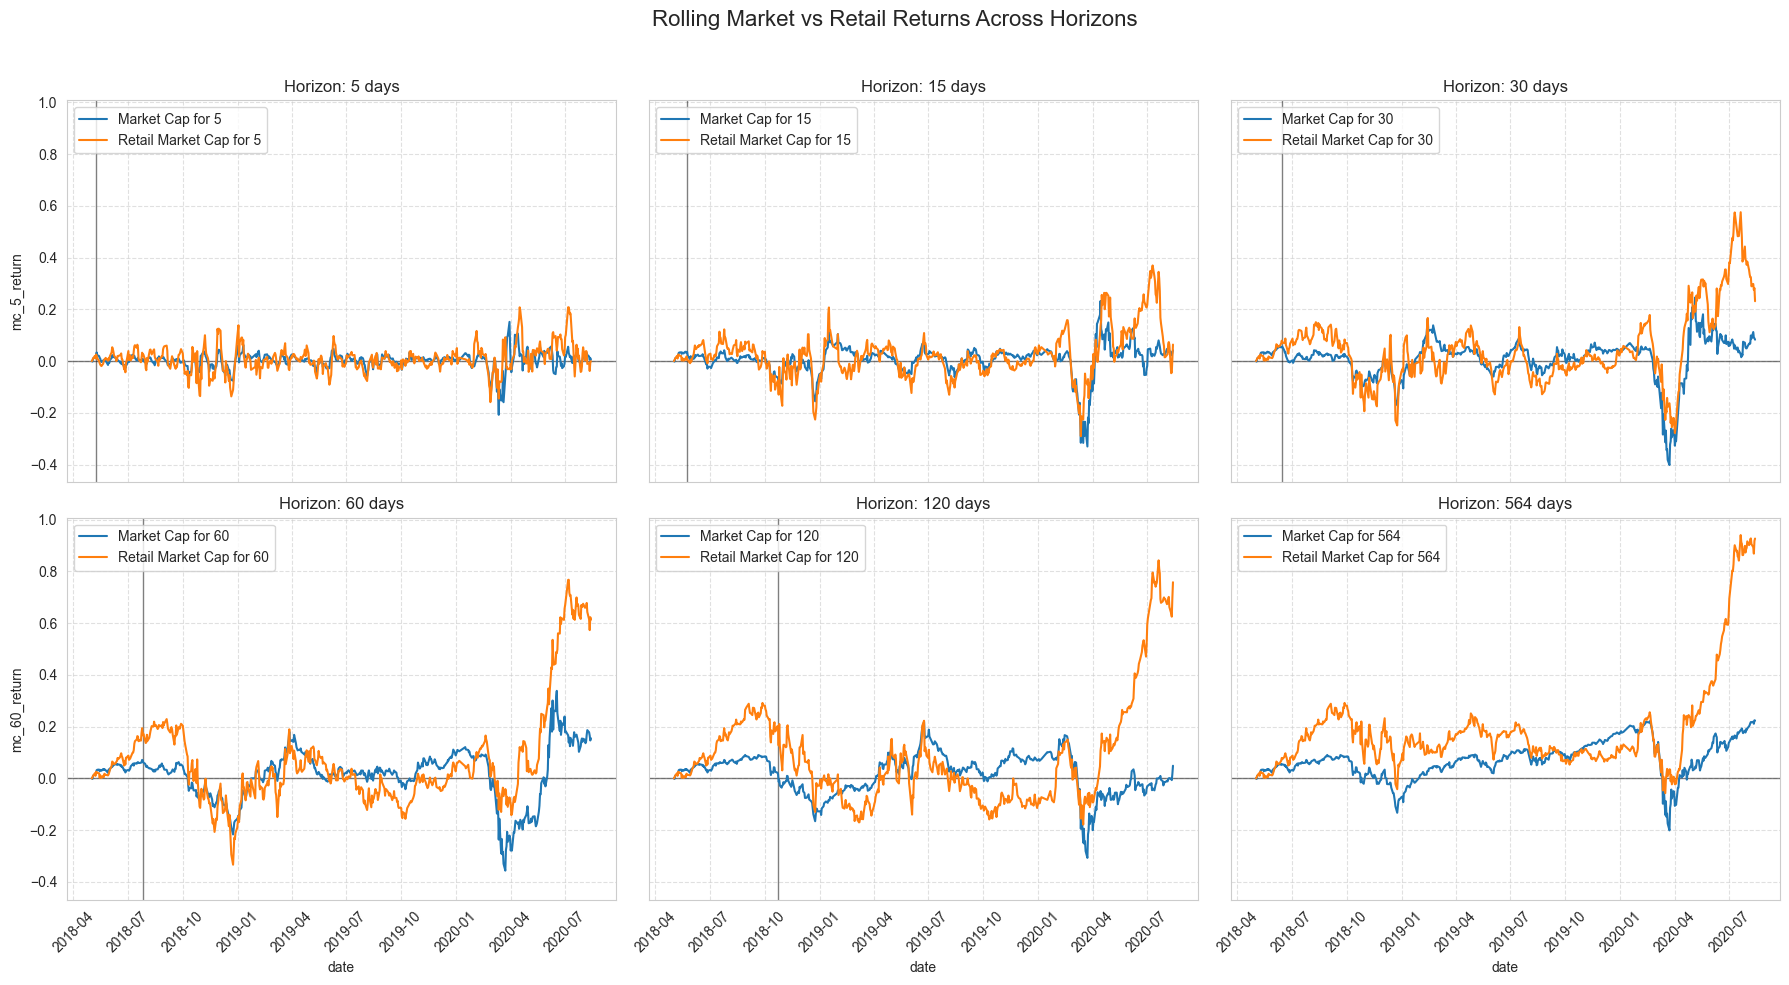

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Apply Seaborn styling
sns.set_style("whitegrid")

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Define colors using Seaborn palette
colors = sns.color_palette()


# Iterate through horizons and create subplots
for i, d in enumerate(horizons):
    ax = axes[i]
    
    # Draw horizontal line at 0
    ax.axhline(0, color="black", alpha=0.5, linewidth=1)
    if d < len(returns):
        ax.axvline(returns.index[d], color="black", alpha=0.5, linewidth=1)

    # Plot Market Cap returns
    sns.lineplot(x=returns.index, y=returns[f"mc_{d}_return"], label=f"Market Cap for {d}", ax=ax, color=colors[0])
    # Plot Retail Market Cap returns
    sns.lineplot(x=returns.index, y=returns[f"rh_portfolio_{d}_return"], label=f"Retail Market Cap for {d}", ax=ax, color=colors[1])


    # Set subplot title
    ax.set_title(f"Horizon: {d} days")

    # Improve X-axis formatting
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)

    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc="upper left")

# Set main figure title
fig.suptitle("Rolling Market vs Retail Returns Across Horizons", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()


In [49]:
returns.describe()

,rh_portfolio,mc,rh_portfolio_cum_return,mc_cum_return,mc_5_return,rh_portfolio_5_return,mc_15_return,rh_portfolio_15_return,mc_30_return,rh_portfolio_30_return,mc_60_return,rh_portfolio_60_return,mc_120_return,rh_portfolio_120_return
count,564.000000,564.000000,564.000000,564.000000,560.000000,560.000000,550.000000,550.000000,535.000000,535.000000,505.000000,505.000000,445.000000,445.000000
mean,0.001643,0.000396,0.191601,0.071788,0.001913,0.007993,0.004945,0.024225,0.008694,0.047908,0.013752,0.071954,0.007204,0.068438
std,0.022895,0.015470,0.193156,0.069591,0.031198,0.048912,0.058997,0.090943,0.082360,0.142127,0.104257,0.204848,0.081338,0.219608
min,-0.080439,-0.125496,-0.057033,-0.200798,-0.207508,-0.158559,-0.329924,-0.290089,-0.401515,-0.278088,-0.356261,-0.333392,-0.307022,-0.178567
25%,-0.009182,-0.003944,0.089928,0.033823,-0.008632,-0.017331,-0.008375,-0.023315,-0.018235,-0.034751,-0.029705,-0.048963,-0.042633,-0.078449
50%,0.001332,0.001012,0.145791,0.070623,0.004961,0.005961,0.014541,0.019808,0.023679,0.024084,0.025478,0.016482,0.006536,0.004551
75%,0.012216,0.006481,0.210864,0.106613,0.016300,0.029120,0.030350,0.057759,0.047701,0.100620,0.069862,0.120340,0.068389,0.119454
max,0.098612,0.086673,0.939919,0.224508,0.151511,0.208069,0.232340,0.369510,0.246006,0.575122,0.338109,0.767349,0.218409,0.842233


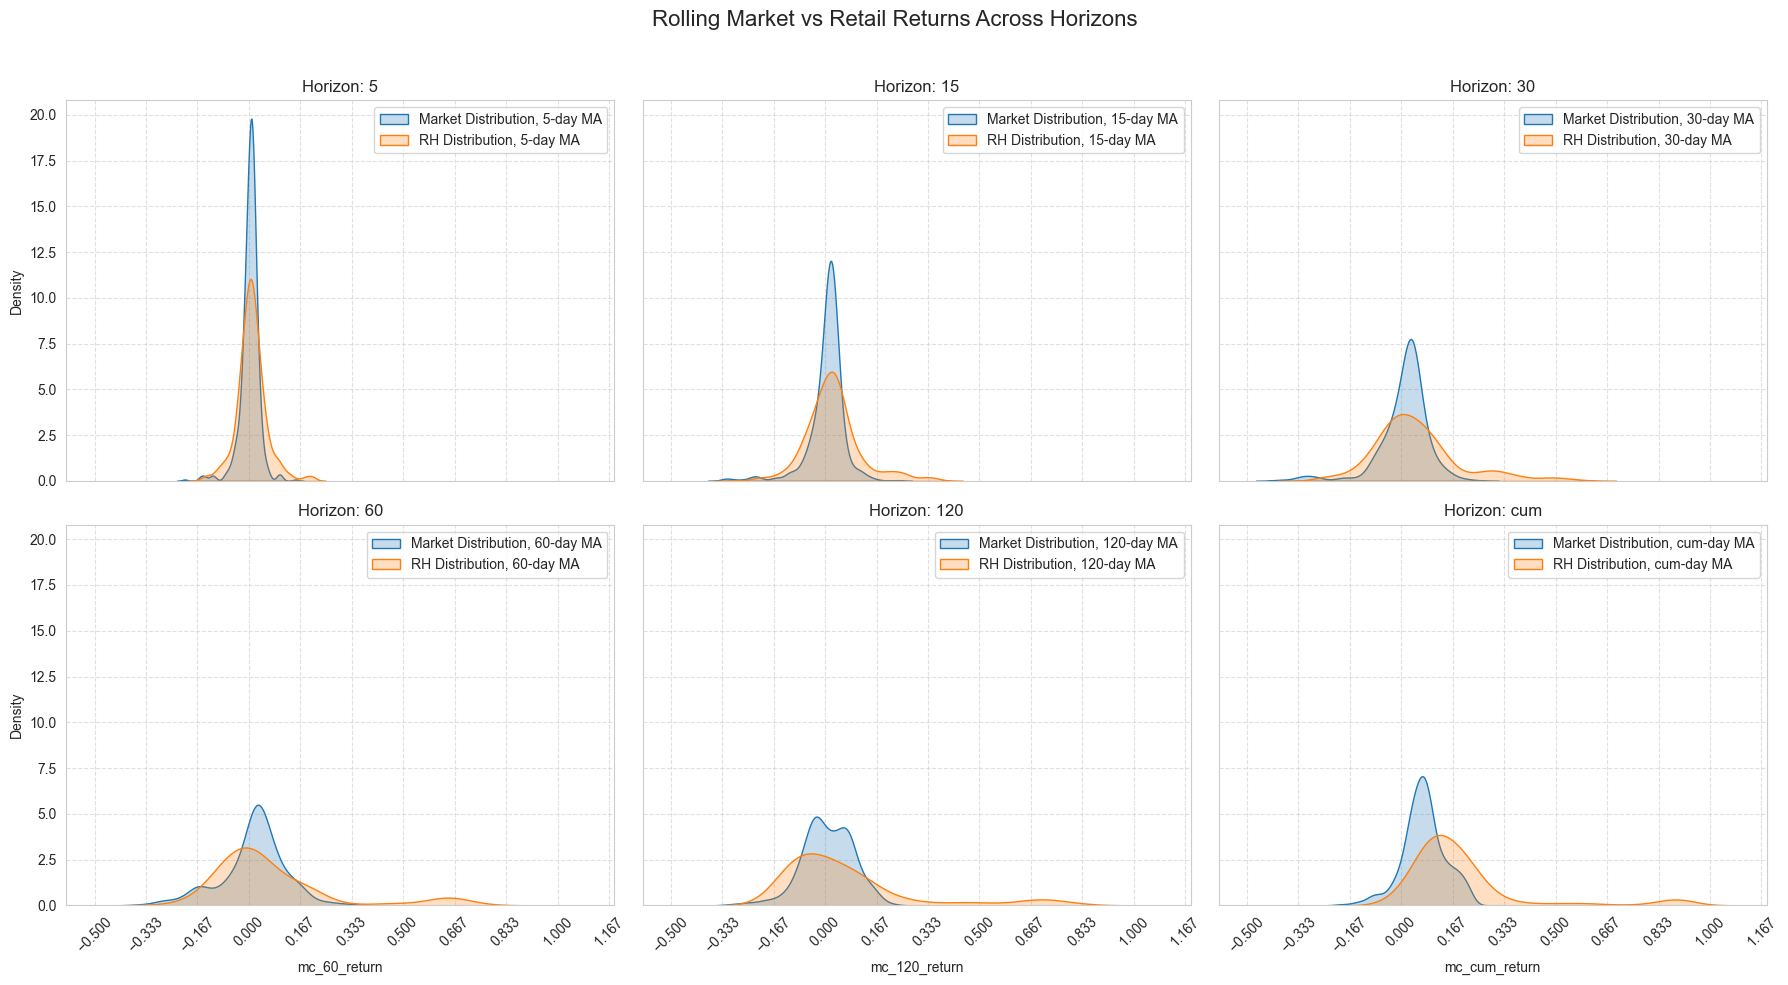

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Apply Seaborn styling
sns.set_style("whitegrid")

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Define colors using Seaborn palette
colors = sns.color_palette()


# Iterate through horizons and create subplots
for i, d in enumerate(horizons):
    ax = axes[i]

    sns.kdeplot(data=returns[f"mc_{d}_return"], label=f"Market Distribution, {d}-day MA", fill=True, ax=ax, color=colors[0])
    sns.kdeplot(data=returns[f"rh_portfolio_{d}_return"], label=f"RH Distribution, {d}-day MA", fill=True, ax=ax, color=colors[1])

    # Set subplot title
    ax.set_title(f"Horizon: {d}")

    # Improve X-axis formatting
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)

    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Set main figure title
fig.suptitle("Rolling Market vs Retail Returns Across Horizons", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()


In [31]:
returns.describe()

,rh_portfolio,mc,rh_portfolio_cum_return,mc_cum_return,mc_5_return,rh_portfolio_5_return,mc_15_return,rh_portfolio_15_return,mc_30_return,rh_portfolio_30_return,mc_60_return,rh_portfolio_60_return,mc_120_return,rh_portfolio_120_return
count,564.000000,564.000000,564.000000,564.000000,560.000000,560.000000,550.000000,550.000000,535.000000,535.000000,505.000000,505.000000,445.000000,445.000000
mean,0.000719,0.000396,-0.011075,0.071788,0.001913,0.003281,0.004945,0.008811,0.008694,0.014274,0.013752,0.006089,0.007204,-0.039285
std,0.018809,0.015470,0.123340,0.069591,0.031198,0.041909,0.058997,0.085603,0.082360,0.136886,0.104257,0.187087,0.081338,0.115575
min,-0.132368,-0.125496,-0.382891,-0.200798,-0.207508,-0.224427,-0.329924,-0.370666,-0.401515,-0.482722,-0.356261,-0.377518,-0.307022,-0.310504
25%,-0.006164,-0.003944,-0.055196,0.033823,-0.008632,-0.012379,-0.008375,-0.019292,-0.018235,-0.043943,-0.029705,-0.075085,-0.042633,-0.121670
50%,0.001141,0.001012,-0.014086,0.070623,0.004961,0.004643,0.014541,0.013020,0.023679,0.018669,0.025478,-0.005808,0.006536,-0.036369
75%,0.009484,0.006481,0.045442,0.106613,0.016300,0.022098,0.030350,0.037619,0.047701,0.052278,0.069862,0.070771,0.068389,0.012622
max,0.072851,0.086673,0.405724,0.224508,0.151511,0.153755,0.232340,0.329388,0.246006,0.408751,0.338109,0.641470,0.218409,0.370780


#### Analyzing from the 2020-03-23 crash

In [63]:
dl.merge_dfs(start_date="2020-03-23")

Merging...


In [71]:
dl.df_merged["rh_portfolio"] = dl.df_merged["retail_weight"] * dl.df_merged["prc_adj"]
dl.df_merged = dl.df_merged[["date", "ticker", "prc_adj", "cumulative_returns", "popularity", "market_weight", "retail_weight","rh_portfolio", "mc"]]
dl.df_merged["market_contribution"] = dl.df_merged["market_weight"] * dl.df_merged["cumulative_returns"]
dl.df_merged["rh_contribution"] = dl.df_merged["retail_weight"] * dl.df_merged["cumulative_returns"]

df = dl.df_merged
df["contribution_difference"] = df["rh_contribution"] - df["market_contribution"] 
df = df.sort_values(by=["date", "contribution_difference"], ascending=[True, True])


In [68]:
df_grouped = df[["date", "contribution_difference"]].groupby("date").sum()
df_grouped

,contribution_difference
date,
2020-03-23,0.000000
2020-03-24,0.012602
2020-03-25,0.030566
2020-03-26,0.018797
2020-03-27,0.008474
...,...
2020-08-07,0.074973
2020-08-10,0.091987
2020-08-11,0.086744


In [ ]:
returns = dl.df_merged[["date", "rh_portfolio", "mc"]].groupby("date").sum()

returns = np.log(returns / returns.shift(1)).fillna(0)
returns.index = pd.to_datetime(returns.index)
original_index = returns.index

#returns = returns.resample("M").sum()


horizons = [5,15,30, 60, len(returns)]

for d in horizons: # delete min_periods if you want to start at date d and not before
    returns[f"mc_{d}_return"] = returns["mc"].rolling(d, min_periods=2).sum().fillna(0)
    returns[f"rh_portfolio_{d}_return"] = returns["rh_portfolio"].rolling(d, min_periods=2).sum().fillna(0)



returns

Index(['rh_portfolio', 'mc', 'rh_portfolio_cum_return', 'mc_cum_return'], dtype='object')


,rh_portfolio,mc,rh_portfolio_cum_return,mc_cum_return,mc_5_return,rh_portfolio_5_return,mc_15_return,rh_portfolio_15_return,mc_30_return,rh_portfolio_30_return,mc_60_return,rh_portfolio_60_return,mc_1_return,rh_portfolio_1_return,difference
date,,,,,,,,,,,,,,,
2020-03-23,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2020-03-24,0.072834,0.086638,0.072834,0.086638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086638,0.072834,-0.013804
2020-03-25,-0.002631,0.014980,0.070203,0.101619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014980,-0.002631,-0.031416
2020-03-26,0.032200,0.055902,0.102403,0.157521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055902,0.032200,-0.055117
2020-03-27,-0.052758,-0.034653,0.049645,0.122868,0.122868,0.049645,NaN,NaN,NaN,NaN,NaN,NaN,-0.034653,-0.052758,-0.073223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,-0.013433,-0.001006,0.728236,0.417440,0.023985,0.042989,0.040046,0.101600,0.086793,0.355329,0.186215,0.641965,-0.001006,-0.013433,0.310796
2020-08-10,0.000250,0.002022,0.728485,0.419462,0.017557,0.022501,0.032490,0.052022,0.112228,0.381340,0.178071,0.625671,0.002022,0.000250,0.309024
2020-08-11,-0.016116,-0.007821,0.712369,0.411640,0.005016,-0.007315,0.022568,0.047721,0.090452,0.344923,0.165243,0.595953,-0.007821,-0.016116,0.300729


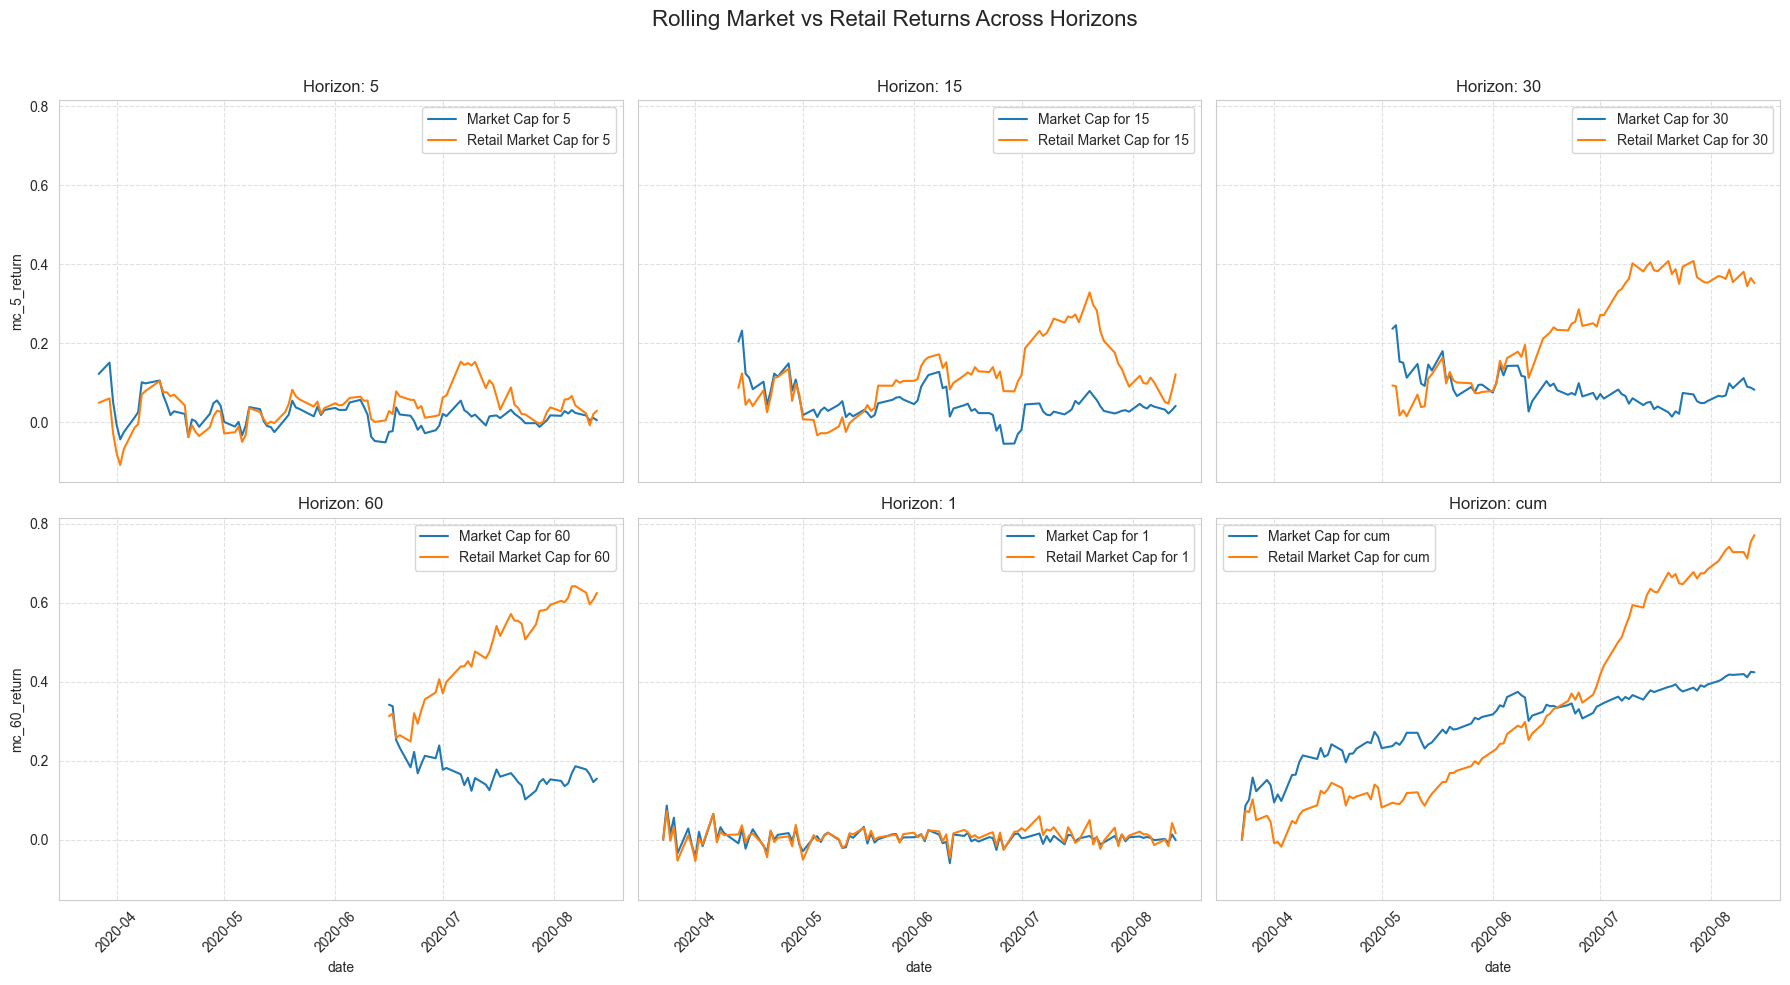

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Apply Seaborn styling
sns.set_style("whitegrid")

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Define colors using Seaborn palette
colors = sns.color_palette()


# Iterate through horizons and create subplots
for i, d in enumerate(horizons):
    ax = axes[i]

    # Plot Market Cap returns
    sns.lineplot(x=returns.index, y=returns[f"mc_{d}_return"], label=f"Market Cap for {d}", ax=ax, color=colors[0])

    # Plot Retail Market Cap returns
    sns.lineplot(x=returns.index, y=returns[f"rh_portfolio_{d}_return"], label=f"Retail Market Cap for {d}", ax=ax, color=colors[1])



    # Set subplot title
    ax.set_title(f"Horizon: {d}")

    # Improve X-axis formatting
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)

    # Add grid and legend
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Set main figure title
fig.suptitle("Rolling Market vs Retail Returns Across Horizons", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()

